In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

sns.set_palette("flare")
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})



In [255]:
errors = pd.read_csv('../Data/RegressionModelErrors.csv')
errors.describe()

,errors
count,4487.000000
mean,0.116568
std,0.121816
min,0.000000
25%,0.023000
50%,0.080000
75%,0.175000
max,0.956000


<Axes: ylabel='Count'>

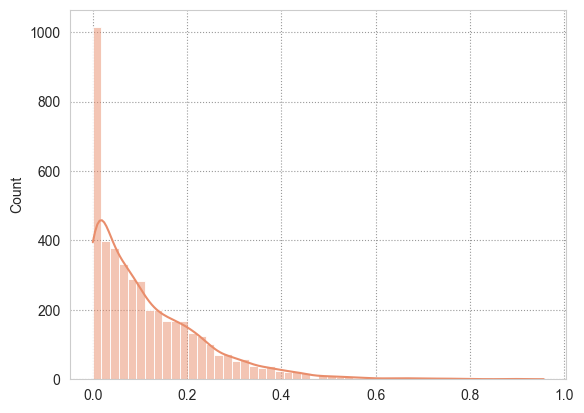

In [256]:
sns.histplot(errors, bins='auto', kde=True, legend=False)

In [257]:
transformer = QuantileTransformer(output_distribution='normal')
errors_transformed = transformer.fit_transform(errors)


<Axes: ylabel='Count'>

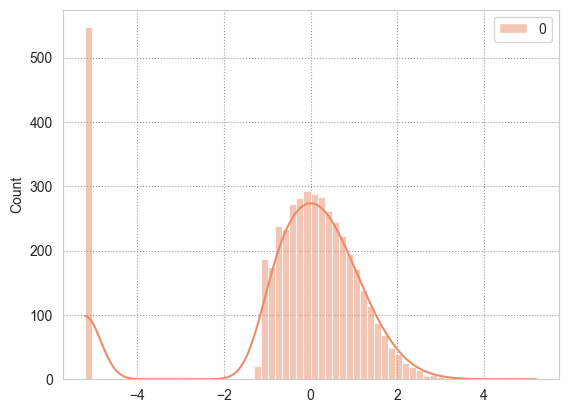

In [258]:
sns.histplot(errors_transformed, bins='auto', kde=True)


In [259]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer()
errors_transformed = transformer.fit_transform(errors)


<Axes: ylabel='Count'>

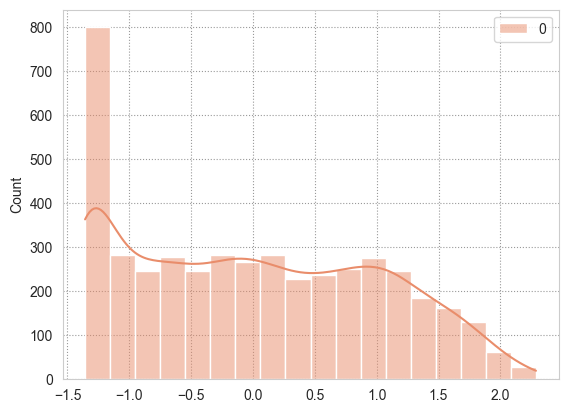

In [260]:
sns.histplot(errors_transformed, bins='auto', kde=True)


In [261]:
import scipy
cdfy = scipy.stats.expon.cdf(np.sort(errors))
invcdf = scipy.stats.norm.ppf(cdfy)

<Axes: ylabel='Count'>

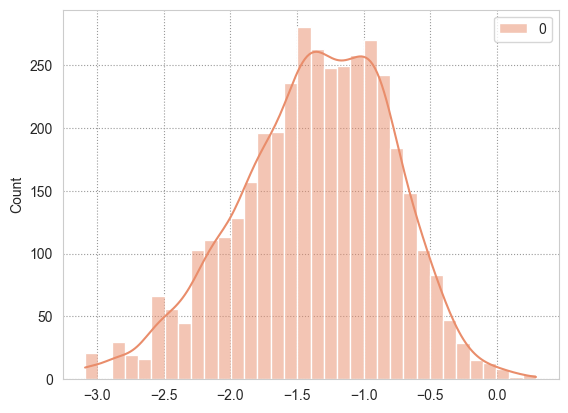

In [262]:
sns.histplot(invcdf, bins='auto', kde=True)

In [263]:
errors_non_absolute = pd.read_csv('../Data/RegressionModelErrorsNonAbsolute.csv')

<Axes: ylabel='Count'>

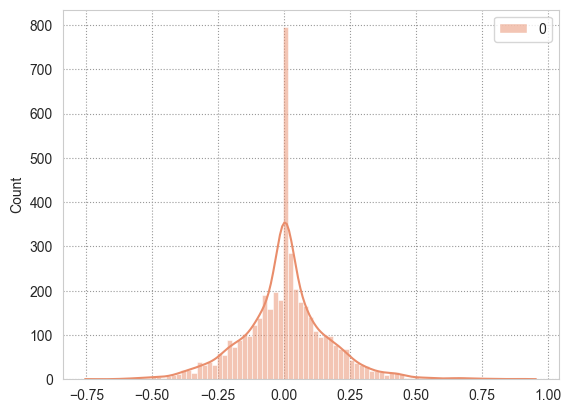

In [270]:
sns.histplot(errors_non_absolute, bins='auto', kde=True)

In [271]:
errors_non_absolute.describe()

,0
count,4487.000000
mean,0.004573
std,0.168550
min,-0.755000
25%,-0.078000
50%,0.000000
75%,0.082000
max,0.956000


In [ ]:
transformer = QuantileTransformer(output_distribution='normal')
errors_non_absolute_transformed = transformer.fit_transform(errors_non_absolute)

<Axes: ylabel='Count'>

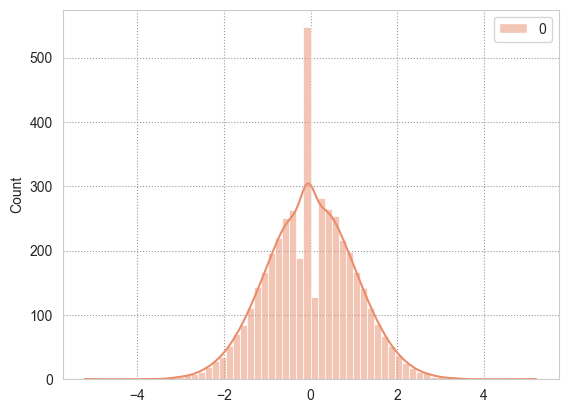

In [ ]:
sns.histplot(errors_non_absolute_transformed, bins='auto', kde=True)

In [ ]:
import scipy.stats as st

t = st.t.interval(
    df=len(errors_non_absolute_transformed)-1,
    loc=np.mean(errors_non_absolute_transformed),
    scale=st.sem(errors_non_absolute_transformed),
    confidence=0.99
) 

In [ ]:
t

(array([-0.03851435]), array([0.03870621]))